In [35]:
from pathlib import Path
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import transforms
import seaborn as sns
import pandas as pd
import gsw

import dtale
from tabulate import tabulate
from IPython.display import display, HTML, Latex
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.expand_frame_repr', True)
pd.set_option("display.latex.repr", True)
pd.set_option("display.latex.longtable", True)
#pd.set_option("display.latex.escape", True)
def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex(escape=False)

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

#pd.get_option("display.max_rows")

def degminstr2deg(coord_str):  # convert coord to degrees, float
    return (lambda d, m: d + m/60)(*np.int32(re.match('(-?\d*)°(-?\d*)', coord_str).groups()))

task_name = '5_TS-analysis'
task_dir = Path('./5 TS-кривые')


In [36]:
# Дата, координаты, скорость ветра, температура Т(С°) и соленость S(‰) морской воды по измерениям на океанографической станции
st_date = pd.Timestamp('1991-01')
st_lat_str, st_lon_str = "32°40', 23°30'".split(', ')
W = 12  # m/s, скорость ветра
alpha = 0  # ° направление откуда дует (180° = северный)
st = pd.read_csv(task_dir / '1_прил1_температура Т(С°) и соленость S(‰) морской воды по измерениям на станции.txt', sep='\t')

In [43]:
# TS Diagram with density contours
t= st['T']
s= st['S']
z= st['z']

# Calculate the density lines
add_to_edge_t = 0.5
add_to_edge_s = 0.2
grid_size = 200  #156
tempL=np.linspace(t.min() - add_to_edge_t, t.max() + add_to_edge_t, grid_size)
salL=np.linspace(s.min() - add_to_edge_s, s.max() + add_to_edge_s, grid_size)
Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), grid_size)

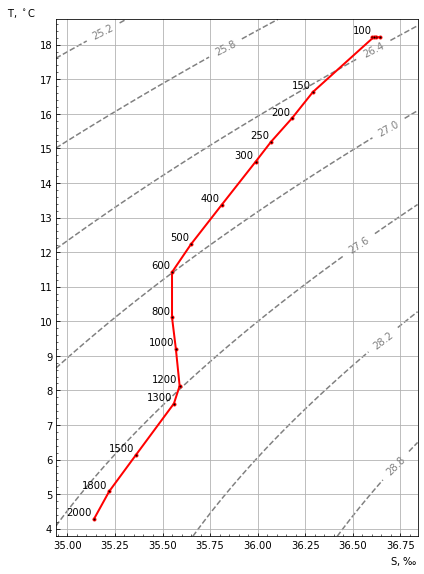

In [49]:
# Plot the contour lines
fig,ax=plt.subplots(figsize=(6,8))
#fig.suptitle('programmer:Hafez Ahmad', fontsize=14, fontweight='bold')
cs = ax.contour(Sg, Tg, sigma_theta, colors='grey', linestyles='dashed', zorder=1)  #levels=np.arange(22,30,.5)
cl = plt.clabel(cs, fontsize=10, inline=True, fmt='%.1f')  # inline=1, fontsize=10, fmt='%0.1f'
# Plot the data

# # with color
# sc=plt.scatter(s, t, c=z, s=10)  # c=data.pres_adjusted[nprof], cmap='viridis_r'
# cb=plt.colorbar(sc, label='Pressure (dbar)');  # 'Density[kg m$^{-3}$]'
sc=plt.plot(s, t, marker='.', color='r', linewidth=2, markerfacecolor='k')

t_prev = 1E100
s_prev = 1E100
for zi, ti, si in zip(z[::-1], t[::-1], s[::-1]):
    if np.abs(t_prev - ti) > 0.5 or np.abs(s_prev - si) > 0.05:
        t_prev, s_prev = ti, si
        ax.text(si - 0.01, ti + 0.1, zi, color='k', horizontalalignment='right') # bbox=dict(boxstyle='square,pad=0.2')

ax.set_xlabel('S, $‰$', loc='right')
ax.set_ylabel('T, $^\circ$C', loc='top', rotation='horizontal')  # °C
# ax.set_title('T-S Diagram',fontsize=14, fontweight='bold')  # 'Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values)
# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=16))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax.grid(axis='x')  #, which='minor'
ax.grid(axis='y')
ax.tick_params(direction='in', which='both')
# cb.ax.tick_params(direction='out')
plt.tight_layout()
plt.savefig(f'hw{task_name}_ts_diagram.png', format='png', dpi=600, transparent=False)
plt.show()